In [1]:
#Importation les modules:

import numpy as np
import pandas as pd
import pickle    
import re
import string

# Importation des données

In [2]:
# Les critiques négatives

neg = pd.read_pickle("C:\\Users\\NGUYEN\\Documents\\Machine learning\\imdb_raw\\imdb_raw_neg.pickle")
#neg 
   

In [3]:
# Les critiques positives

pos = pd.read_pickle("C:\\Users\\NGUYEN\\Documents\\Machine learning\\imdb_raw\\imdb_raw_pos.pickle")
#pos    

# Nettoyage des données

In [4]:
#Transformer la liste des critiques négatives en DataFrame et ajouter la valeur '0'

df_neg = pd.DataFrame(neg,columns=['commentaires'])
df_neg['valeur'] = 0
df_neg


,commentaires,valeur
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0
...,...,...
12495,I occasionally let my kids watch this garbage ...,0
12496,When all we have anymore is pretty much realit...,0
12497,The basic genre is a thriller intercut with an...,0
12498,Four things intrigued me as to this film - fir...,0


In [5]:
#Transformer la liste des critiques positives en DataFrame et ajouter la valeur '1'

df_pos = pd.DataFrame(pos,columns=['commentaires'])
df_pos['valeur'] = 1
df_pos 

,commentaires,valeur
0,I went and saw this movie last night after bei...,1
1,Actor turned director Bill Paxton follows up h...,1
2,As a recreational golfer with some knowledge o...,1
3,"I saw this film in a sneak preview, and it is ...",1
4,Bill Paxton has taken the true story of the 19...,1
...,...,...
12495,I was extraordinarily impressed by this film. ...,1
12496,"Although I'm not a golf fan, I attended a snea...",1
12497,"From the start of ""The Edge Of Love"", the view...",1
12498,"This movie, with all its complexity and subtle...",1


In [6]:
#Concaténation 2 dataframe:
 
critique =pd.concat([df_pos,df_neg], ignore_index = True)  
critique


,commentaires,valeur
0,I went and saw this movie last night after bei...,1
1,Actor turned director Bill Paxton follows up h...,1
2,As a recreational golfer with some knowledge o...,1
3,"I saw this film in a sneak preview, and it is ...",1
4,Bill Paxton has taken the true story of the 19...,1
...,...,...
24995,I occasionally let my kids watch this garbage ...,0
24996,When all we have anymore is pretty much realit...,0
24997,The basic genre is a thriller intercut with an...,0
24998,Four things intrigued me as to this film - fir...,0


In [7]:
def text_preproc(x):
    
    x = x.lower()
    x = ' '.join([word for word in x.split(' ') if word not in stop_words])
    x = x.encode('ascii', 'ignore').decode()
    x = re.sub(r'https*\S+', ' ', x)
    x = re.sub(r'@\S+', ' ', x)
    x = re.sub(r'#\S+', ' ', x)
    x = re.sub(r'\'\w+', '', x)
    x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
    x = re.sub(r'\w*\d+\w*', '', x)
    x = re.sub(r'\s{2,}', ' ', x)
    
    return x

In [8]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = stopwords.words('english')
#stop_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NGUYEN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
#Les données après la nettoyage 

critique['commentaires'].apply(text_preproc)

0        went saw movie last night coaxed friends mine ...
1        actor turned director bill paxton follows prom...
2        recreational golfer knowledge sport history pl...
3        saw film sneak preview delightful cinematograp...
4        bill paxton taken true story us golf open made...
                               ...                        
24995    occasionally let kids watch garbage understand...
24996    anymore pretty much reality tv shows people ma...
24997    basic genre thriller intercut uncomfortable me...
24998    four things intrigued film firstly stars carly...
24999    david bryce comments nearby exceptionally well...
Name: commentaires, Length: 25000, dtype: object

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect =  CountVectorizer(stop_words)    #Initialiser le CountVectorizer

#Transformer textes en vecteurs
count_matrix = count_vect.fit_transform(critique['commentaires'].apply(text_preproc))
count_matrix


C:\Users\NGUYEN\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass input=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few

<25000x72435 sparse matrix of type '<class 'numpy.int64'>'
	with 2532036 stored elements in Compressed Sparse Row format>

# Construction du modèle régression logistique

In [11]:
#Construire X et Y:

X = count_matrix        # variable explicative
y = critique.valeur   # variable à expiquer


In [12]:
#Diviser la base de données en 30% de test et 70% d'apprentissage afin de comprendre la performance du modèle

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [13]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=30) # Initialiser le modèle 

logreg.fit(X_train, y_train)      # Adapter le modèle avec des données

y_pred = logreg.predict(X_test)


C:\Users\NGUYEN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Evaluation les performances du modèle

In [14]:
# Training score

X_train_pred = logreg.predict(X_train)

from sklearn.metrics import accuracy_score
training_score = accuracy_score(y_train, X_train_pred )
training_score

0.9993142857142857

In [15]:
# Testing score

X_test_pred = logreg.predict(X_test)

test_score = accuracy_score(y_test, X_test_pred)
test_score

0.8801333333333333

In [16]:
# Matrice de confusion

from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix


array([[3282,  464],
       [ 435, 3319]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

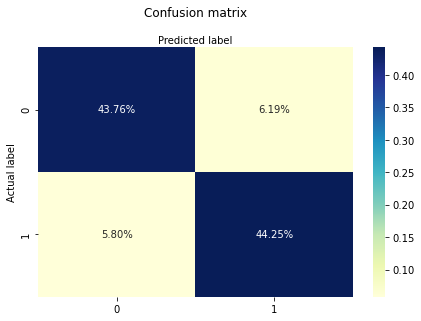

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

class_names=['Négatif', 'Positif']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#Création heatmap
sns.heatmap(confusion_matrix/np.sum(confusion_matrix),annot=True,fmt='.2%', cmap="YlGnBu")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



    Selon le graphique, on peut constater que
    - Il y a 88,01% de vrais prédictions dont 43,76% de vrais négatives et 44,25% de vrais positives. 
    - Il y a 11,99% de faux prédictions dont 5,80% de faux négatives et 6,19% de faux positives.

In [18]:
#Classification_report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.88      0.88      3746
           1       0.88      0.88      0.88      3754

    accuracy                           0.88      7500
   macro avg       0.88      0.88      0.88      7500
weighted avg       0.88      0.88      0.88      7500




D'après le résultat, on peut noter que la précision de la classification est bonne avec 88% 
  
  
  

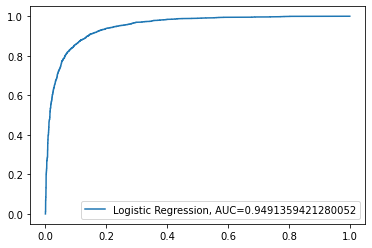

In [19]:
# ROC Curve

from sklearn.metrics import roc_auc_score

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))
plt.legend(loc=4)
plt.show()


    AUC score qui est égal à 1 représente une bonne classification. AUC score qui est égal à 0,5 représente une mauvaise 
    classification.
    Ici, le AUC score est égal à 0,95. Cela signifie que c'est une bonne classification.

# Les 10 mots qui ont le plus de poids dans la prise de décision du modèle

In [20]:
#Sortir les coefficients du modèles en  valeur absolue

beta = abs(logreg.coef_)
beta

array([[0.03573019, 0.06782299, 0.        , ..., 0.00258452, 0.        ,
        0.09911135]])

In [21]:
# Trier les coefficients par ordre croissant

beta.sort()
beta

array([[0.        , 0.        , 0.        , ..., 1.89160855, 2.39962883,
        2.62363095]])

In [23]:
# Trier les coefficients par ordre décroissant

beta_des = beta[0][::-1]
beta_des

array([2.62363095, 2.39962883, 1.89160855, ..., 0.        , 0.        ,
       0.        ])

In [24]:
#Renvoyer les indices des 10 coefficients les plus grands dans "béta_des"

idx_top_10 = np.argsort(beta_des)[:9]
idx_top_10

array([72434, 65916, 65915, 65914, 65913, 65912, 65911, 65910, 65909],
      dtype=int64)

In [25]:
#Créer la liste des indices:

idx_list = []
for i in idx_top_10:
    idx_list.append(i)
idx_list


[72434, 65916, 65915, 65914, 65913, 65912, 65911, 65910, 65909]

In [26]:
count_vect.vocabulary_

{'went': 70261,
 'saw': 55536,
 'movie': 42321,
 'last': 36244,
 'night': 43740,
 'coaxed': 11851,
 'friends': 24747,
 'mine': 41065,
 'admit': 729,
 'reluctant': 52640,
 'see': 56441,
 'knew': 35293,
 'ashton': 3336,
 'kutcher': 35733,
 'able': 141,
 'comedy': 12261,
 'wrong': 71527,
 'played': 48408,
 'character': 10334,
 'jake': 33403,
 'fischer': 23436,
 'well': 70224,
 'kevin': 34846,
 'costner': 13769,
 'ben': 5596,
 'randall': 51438,
 'professionalism': 49967,
 'sign': 57943,
 'good': 26703,
 'toy': 65340,
 'emotions': 20324,
 'one': 45036,
 'exactly': 21517,
 'that': 64065,
 'entire': 20770,
 'theater': 64091,
 'which': 70451,
 'sold': 59361,
 'out': 45561,
 'overcome': 45770,
 'laughter': 36328,
 'first': 23421,
 'half': 28087,
 'moved': 42315,
 'tears': 63551,
 'second': 56366,
 'exiting': 21758,
 'many': 39105,
 'women': 71193,
 'full': 24968,
 'grown': 27509,
 'men': 40375,
 'trying': 66161,
 'desperately': 16642,
 'let': 36855,
 'anyone': 2561,
 'crying': 14637,
 'great': 

In [27]:
#Récupérer les 10 mots que ces indices impliquent

top_10_words = []
for j in idx_list :
    top_10_words.append(list(count_vect.vocabulary_.keys())[list(count_vect.vocabulary_.values()).index(j)])
top_10_words      
        

['zzzzzzzzzzzzzzzzzz',
 'trinitron',
 'trinitarian',
 'trinidad',
 'trinians',
 'trinian',
 'tringtignat',
 'tringtignant',
 'trine']

In [ ]:
print(count_vect.get_feature_names()[idx_list)